In [1]:
from __future__ import division
%matplotlib inline
import emcee
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from model_fit import *

In [2]:
model = 'gaussian'

In [11]:
freqs, temp, err = np.loadtxt('dataset8.txt', unpack = True)

In [243]:
print max(freqs), min(freqs)

160.0 40.0


In [244]:
priors_gauss = np.array([0.,1000., min(freqs),max(freqs), 0.,40., 0.,10., -10.,0., -1.,1.])

In [245]:
ndim = int(np.size(priors_gauss)/2)

In [246]:
print ndim

6


In [247]:
mid = np.zeros(ndim)

In [248]:
for i in range(ndim):
    mid[i] = priors_gauss[2*i] + priors_gauss[2*i + 1]

In [249]:
mid = 0.5 * mid

In [250]:
fun = lambda *args: -lnhood(*args)

In [251]:
result = op.minimize(fun, mid, args=(model, temp, freqs, err), method = 'L-BFGS-B')

In [252]:
print result.x

[  4.96974079e+02   4.61359482e+01   2.78220898e+01   7.50008337e+00
  -2.55006234e+00   9.98692369e-02]


In [302]:
nwalkers = 200

In [303]:
z = np.zeros((ndim, nwalkers))

In [304]:
h = 1e-2

In [305]:
pos_i=[]

In [306]:
np.random.seed(0)

In [307]:
for i in range(ndim):
    z[i,:] = result.x[i] + h*np.random.rand(nwalkers)

In [308]:
for i in range(nwalkers):
    pos_i.append(np.array([z[0,i],z[1,i],z[2,i],z[3,i],z[4,i],z[5,i]]))

In [315]:
b_steps,  steps = 500, 1000

In [316]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(model, temp, freqs, err, priors_gauss,0.0))

In [317]:
pos, prob, state = sampler.run_mcmc(pos_i, b_steps)

In [318]:
sampler.reset()

In [319]:
_, _, _ = sampler.run_mcmc(pos, steps, rstate0=state)

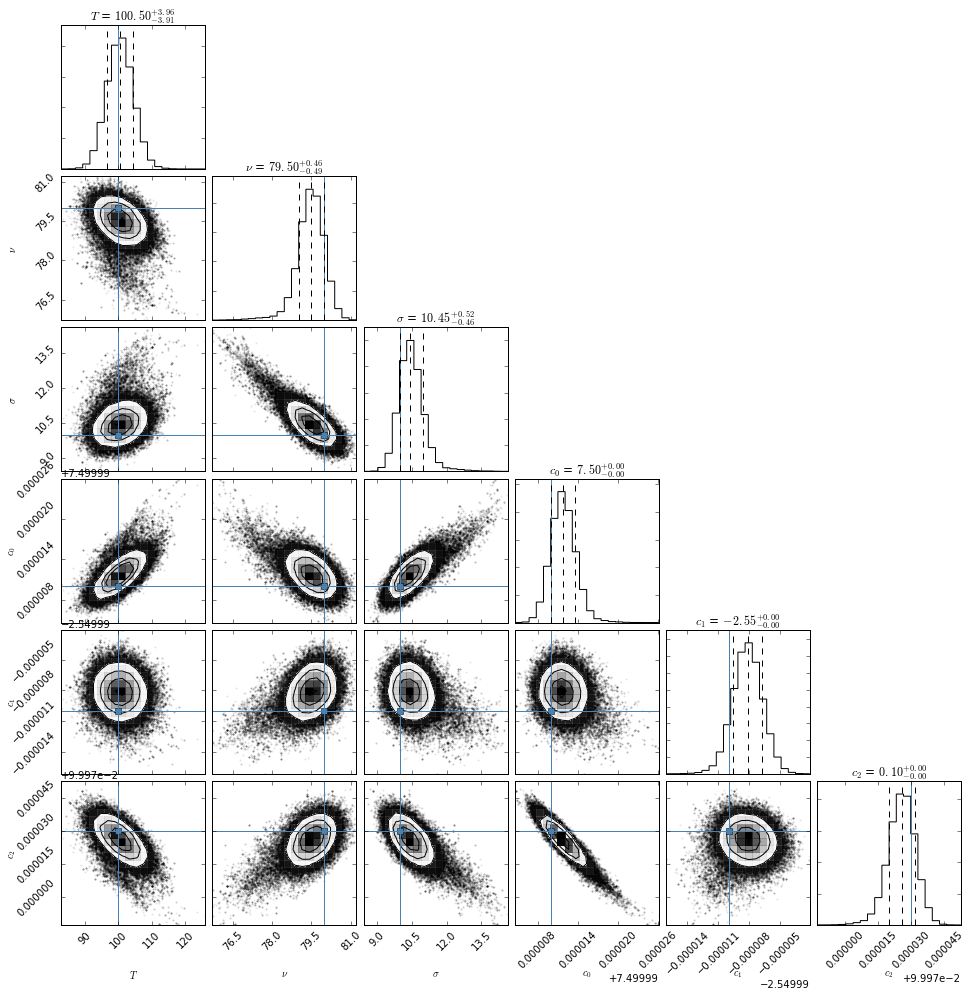

In [320]:
fig = corner.corner(sampler.flatchain, labels = ['$T$',r'$\nu$',r'$\sigma$',r'$c_0$',r'$c_1$',r'$c_2$'], truths=[100.,80.,10.,7.5,-2.55,0.1],quantiles=[0.16, 0.5, 0.84],show_titles=True );

In [266]:
fig.savefig('mcmc_gauss3.pdf')

In [267]:
np.savetxt('mcmc_gauss3.txt', sampler.flatchain)

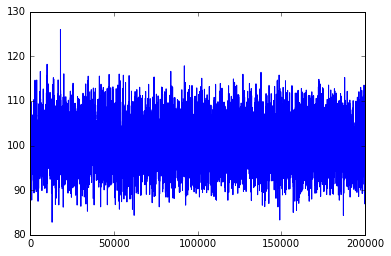

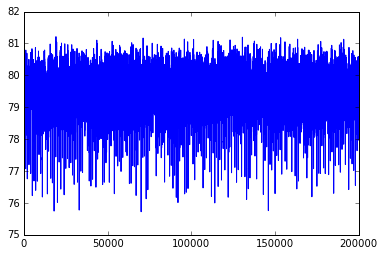

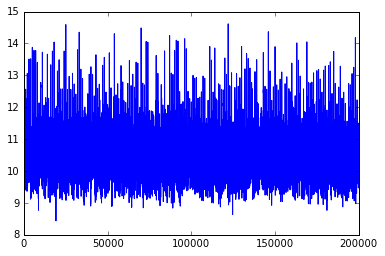

In [321]:
plt.figure()
plt.plot(sampler.flatchain[:,0])
plt.figure()
plt.plot(sampler.flatchain[:,1])
plt.figure()
plt.plot(sampler.flatchain[:,2])

In [323]:
t_corr = np.zeros((nwalkers,steps))                
nu_corr = np.zeros((nwalkers,steps)) 
s_corr = np.zeros((nwalkers,steps)) 

In [326]:
for i in range(nwalkers):
    t_corr[i] = emcee.autocorr.function(sampler.chain[i,:,0],axis=0)
    nu_corr[i] = emcee.autocorr.function(sampler.chain[i,:,1],axis=0)
    s_corr[i] = emcee.autocorr.function(sampler.chain[i,:,2],axis=0)

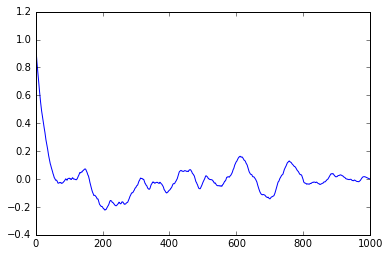

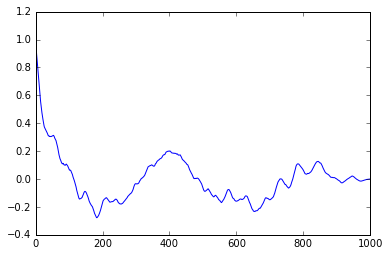

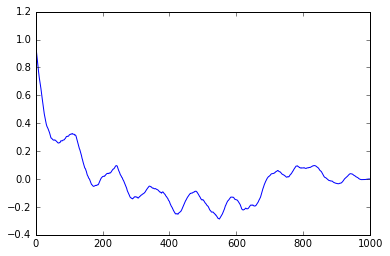

In [344]:
number = 60
plt.figure()
plt.plot(t_corr[number][:])
plt.figure()
plt.plot(nu_corr[number][:])
plt.figure()
plt.plot(s_corr[number][:])

In [331]:
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(model, temp, freqs, err, priors_gauss,0.0))

In [332]:
sampler2.run_mcmc(pos_i,steps)

(array([[  1.00274234e+02,   7.94851283e+01,   1.06760638e+01,
           7.50000250e+00,  -2.55000026e+00,   9.99990265e-02],
        [  9.73537075e+01,   7.99757530e+01,   1.07591061e+01,
           7.50000129e+00,  -2.54999704e+00,   9.99982376e-02],
        [  9.83585591e+01,   7.97986531e+01,   9.91766837e+00,
           7.49999924e+00,  -2.54999935e+00,   1.00000787e-01],
        ..., 
        [  9.82831324e+01,   7.95194245e+01,   9.54678090e+00,
           7.49999896e+00,  -2.54999753e+00,   1.00003741e-01],
        [  9.55282786e+01,   7.92528670e+01,   1.00217519e+01,
           7.49999959e+00,  -2.54999889e+00,   1.00003084e-01],
        [  1.07071709e+02,   7.88735942e+01,   1.15169469e+01,
           7.50000483e+00,  -2.54999909e+00,   9.99897136e-02]]),
 array([ 432.96420339,  433.06082356,  432.31634408,  433.47922423,
         431.16991044,  433.66685642,  430.47142086,  433.91256829,
         433.63006645,  433.23604701,  434.60673113,  430.68200305,
         433.35171

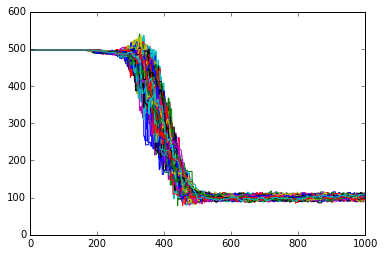

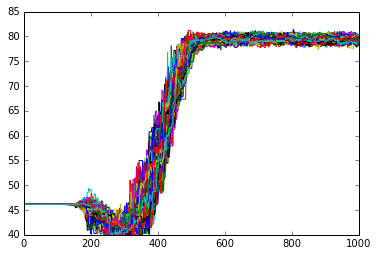

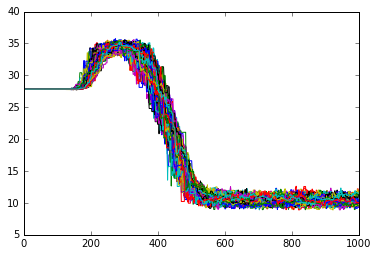

In [342]:
plt.figure()
plt.plot(sampler2.chain[:,:,0].T);
plt.figure()
plt.plot(sampler2.chain[:,:,1].T);
plt.figure()
plt.plot(sampler2.chain[:,:,2].T);

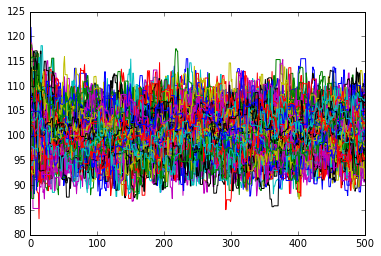

In [339]:
plt.figure()
plt.plot(sampler2.chain[:,500:,0].T);